In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "text.latex.preamble": r'\usepackage{amsfonts}',
}
)


## Q1(a)
The normal equation for least square problem is: 
$$A^TAx = A^Tb$$
Since we only have $k$ measurements, substitute the new $A$ and $b$ we can get:
$$[\tilde{a}_1 \tilde{a}_2 \ldots \tilde{a}_k]\begin{bmatrix}
\tilde{a}^T_1 \\ \tilde{a}^T_2 \\ \vdots \\ \tilde{a}^T_k
\end{bmatrix}x = [\tilde{a}_1 \tilde{a}_2 \ldots \tilde{a}_k]\begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_k
\end{bmatrix}$$
Expand the above equation and substitue $x = \hat{x}_k$, we have:
$$
\left(\sum_{i=1}^k\tilde{a}_i\tilde{a}_i^T\right)\hat{x}_k = \sum_{i=1}^kb_i\tilde{a}_i\tag*{$\blacksquare$}
$$


## Q1(b)
Given the matrix inversion lemma:
$$ \left(A-BD^{-1}C\right)^{-1} = A^{-1} + A^{-1}B\left(D-CA^{-1}B\right)^{-1}C$$
Let $A = P_k, B=-\tilde{a}_{k+1}, C=\tilde{a}_{k+1}^T, D=1$
We can rewrite the update of $P_{k+1}^{-1}$ as:
\begin{align*} 
(P_k + \tilde{a}_{k+1}\tilde{a}^T_{k+1})^{-1} & = P_k^{-1} - P_k^{-1}\tilde{a}_{k+1}(1+\tilde{a}_{k+1}^TP_k^{-1}\tilde{a}_{k+1})\tilde{a}_{k+1}^T \\
&=P_k^{-1} - P_k^{-1}\frac{\tilde{a}_{k+1}\tilde{a}_{k+1}^T}{1 + \tilde{a}_{k+1}^TP^{-1}_k \tilde{a}_{k+1}}
\end{align*}

Because $\tilde{a}_{k+1}^TP^{-1}_k \tilde{a}_{k+1}$ is a scalar, so we only need to calculate the inverse of a scalar instead of a matrix, which saves computation a lot.

## Q2(a)
First we can calcualte the joint distribution of $[x,y]^T$ as:
$$\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}F & I & 0 \\G & 0 & I \end{bmatrix}\begin{bmatrix}z \\ v \\ w\end{bmatrix}
\sim \mathcal{N}\left(\begin{bmatrix}F\bar{z}+\bar{v} \\ G\bar{z}+\bar{w}\end{bmatrix},\begin{bmatrix}F & I & 0 \\G & 0 & I \end{bmatrix}
\begin{bmatrix}\Sigma_z &  & \\ & \Sigma_v & \\ & & \Sigma_w\end{bmatrix}
\begin{bmatrix}F^T & G^T\\ I & 0 \\ 0 & I \end{bmatrix}\right)
$$


$$\Rightarrow \begin{bmatrix}x \\ y\end{bmatrix} \sim \mathcal{N}\left(
\begin{bmatrix}F\bar{z}+\bar{v} \\ G\bar{z}+\bar{w}\end{bmatrix},
\begin{bmatrix}
F\Sigma_zF^T+\Sigma_v & F\Sigma_zG^T\\
G\Sigma_zF^T & G\Sigma_zG^T+\Sigma_w
\end{bmatrix}
\right)$$

We can then obtain $\Sigma_{xy} = F\Sigma_zG^T$. 
Based on the normal distribution conditional probability equation, we can write the mean and covariance matrix of $P(x|y)$, which are also the MMSE estimator:

\begin{align*}
\mathrm{MMSE}_{x|y} = E(x|y) & = \mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y)\\
&=F\bar{z} + \bar{v} + F\Sigma_zG^T(G\Sigma_zG^T+\Sigma_w)^{-1}(y-G\bar{z}-\bar{w})\\
Cov(x|y) & = \Sigma_x - \Sigma_{xy}\Sigma_y^{-1}\Sigma_{yx}\\
&= F\Sigma_zF^T + \Sigma_v - F\Sigma_zG^T(G\Sigma_zG^T+\Sigma_w)^{-1}G\Sigma_zF^T
\end{align*}

## Q2(b)
Knowing that $v$ and $w$ are identical does not necessariliy reduce the error in estimation. This depends on the reltionship between $\Sigma_w$ and $\Sigma_v$. 
First, let's write out the new MMSE estimator and the associated covariance given $v=w$.
The joint distribution can now be written as:

$$\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}F & I\\G & I \end{bmatrix}\begin{bmatrix}z \\ v\end{bmatrix}
\sim \mathcal{N}\left(\begin{bmatrix}F\bar{z}+\bar{v} \\ G\bar{z}+\bar{v}\end{bmatrix},\begin{bmatrix}F & I\\G & I \end{bmatrix}
\begin{bmatrix}\Sigma_z &  \\ & \Sigma_v \end{bmatrix}
\begin{bmatrix}F^T & G^T\\ I & I\end{bmatrix}\right)
$$
$$\Rightarrow \begin{bmatrix}x \\ y\end{bmatrix} \sim \mathcal{N}\left(
\begin{bmatrix}F\bar{z}+\bar{v} \\ G\bar{z}+\bar{v}\end{bmatrix},
\begin{bmatrix}
F\Sigma_zF^T+\Sigma_v & F\Sigma_zG^T + \Sigma_v\\
G\Sigma_zF^T  + \Sigma_v& G\Sigma_zG^T+\Sigma_v
\end{bmatrix}
\right)$$

The new MMSE estimator and its associate covariance are:
\begin{align*}
\mathrm{MMSE}_{x|y} = E(x|y) & = \mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y)\\
&=F\bar{z} + \bar{v} + (F\Sigma_zG^T+\Sigma_v)(G\Sigma_zG^T+\Sigma_v)^{-1}(y-G\bar{z}-\bar{w})\\
Cov(x|y) & = \Sigma_x - \Sigma_{xy}\Sigma_y^{-1}\Sigma_{yx}\\
&= F\Sigma_zF^T + \Sigma_v - (F\Sigma_zG^T+\Sigma_v)(G\Sigma_zG^T+\Sigma_v)^{-1}(G\Sigma_zF^T+\Sigma_v)
\end{align*}

Because we know $\mathrm{MSE}(x|y) = \mathrm{tr}(Cov(x|y))$, essential we need to compare the following two values:
\begin{align*}
\mathrm{MSE}_a &= \mathrm{Tr}\left(F\Sigma_zF^T + \Sigma_v - F\Sigma_zG^T(G\Sigma_zG^T+\Sigma_w)^{-1}G\Sigma_zF^T\right)\\
\mathrm{MSE}_b &= \mathrm{Tr}\left(F\Sigma_zF^T + \Sigma_v - (F\Sigma_zG^T+\Sigma_v)(G\Sigma_zG^T+\Sigma_v)^{-1}(G\Sigma_zF^T+\Sigma_v)\right)
\end{align*}

To simplify this, let $F=G=I$, $\Sigma_z=I$
The above two equations can be written as:
\begin{align*}
\mathrm{MSE}_a &= \mathrm{Tr}(I + \Sigma_v - (I + \Sigma_w)^{-1})\\
\mathrm{MSE}_b &= \mathrm{Tr}(I + \Sigma_v - (I + \Sigma_v)(I + \Sigma_v)^{-1}(I + \Sigma_v)) \\
&=\mathrm{Tr}(I + \Sigma_v - (I+\Sigma_v))
\end{align*}

So we are actually comparing $\Sigma_v$ and $\Sigma_w$. If $\Sigma_w \succ \Sigma_v$, then knowing $w = v$ improves the result. However, if $\Sigma_w \prec \Sigma_v$, knowing $w = v$ actually worsens the estimation.

## Q3(a)
For a rough estimation, the 95% interval is $[\mu - 2\sigma, \mu + 2\sigma]$, so the confidence interval in this case is $[-3.5, 4.5]$
To calculate a more precise result, we can use the `scipy.norm.interval` function in `scipy` package:

In [44]:
print('The 95% interval is: ', scipy.stats.norm.interval(0.95, loc=0.5, scale=2))

The 95% interval is:  (-3.419927969080108, 4.419927969080108)


## Q3(b)
The joint distribution of $x$ and $y_1$ can be written as:
$$\begin{bmatrix}x \\ y_1\end{bmatrix} = \begin{bmatrix}I & 0 \\I & I \end{bmatrix}\begin{bmatrix}x \\ w\end{bmatrix}
\sim \mathcal{N}\left(\begin{bmatrix}\mu_x \\ \mu_x+\mu_w\end{bmatrix},\begin{bmatrix}I & 0 \\I & I \end{bmatrix}\begin{bmatrix}\sigma_x^2 & \\ & \sigma_w^2\end{bmatrix}
\begin{bmatrix}I & I\\0 & I\end{bmatrix}\right)
$$
So we have:
$$
\Sigma_{xy} = \Sigma_{yx} = \Sigma_x, \;\;\; \Sigma_y = \Sigma_x + \Sigma_w 
$$
where $\Sigma_x = \sigma_x^2$ and $\Sigma_w = \sigma_w^2$. 

According to the equation of conditional probability $P(x|y)$, the mean and variance of the updated normal distribution is:
$$ E(x|y_1) = \mu_x + \frac{\sigma_x^2}{\sigma_x^2+\sigma_w^2}(y_1-\mu_x) = 1.06$$
$$ Cov(x|y_1) = \sigma_x^2 - \frac{\sigma_x^2}{\sigma_x^2+\sigma_w^2}\sigma_x^2 = 0.8$$

In [45]:
print('The 95% interval is: ', scipy.stats.norm.interval(0.95, loc=1.06, scale=np.sqrt(0.8)))

The 95% interval is:  (-0.693045081153163, 2.813045081153163)


## Q3(c)
Let's first write the joint distribution of $[x, y_1, y_2]^T$:
\begin{align*}
\begin{bmatrix}x \\ y_1 \\ y_2\end{bmatrix} = 
\begin{bmatrix}I & 0 & 0 \\ I & I & 0\\ I & 0 & I\end{bmatrix} \begin{bmatrix}x \\ w_1 \\ w_2\end{bmatrix} = A\textbf{x}
\sim \mathcal{N}\left(\begin{bmatrix}\mu_x\\\mu_x+\mu_{w_1} \\ \mu_x+\mu_{w_2}\end{bmatrix},
A\begin{bmatrix}\sigma_x^2 & & \\ & \sigma_{w_1}^2 & \\ & & \sigma_{w_2}^2\end{bmatrix}A^T\right)
\end{align*}
where the covariance of the joint distribution could be written as:
$$
A\begin{bmatrix}\Sigma_x & & \\ & \Sigma_{w_1} & \\ & & \Sigma_{w_2}\end{bmatrix}A^T = 
\left[\begin{array}{c|cc}
\sigma_x^2 & \sigma_x^2 & \sigma_x^2 \\
\hline
\sigma_x^2 & \sigma_x^2 + \sigma_{w_1}^2 & \sigma_x^2 \\
\sigma_x^2 &  \sigma_x^2 & \sigma_x^2 + \sigma_{w_2^2} 
\end{array}\right]
$$
We can think group $y_1$ and $y_2$ together within a measurement vector $\textbf{y}$. Then we have the following covariance matrices:
$$
\Sigma_{x\textbf{y}} = [\sigma_x^2 \; \sigma_x^2]\\
\Sigma_{\textbf{y}} = 
\begin{bmatrix}
\sigma_x^2+\sigma_{w_1}^2 & \sigma_x^2 \\
\sigma_x^2 & \sigma_x^2+\sigma_{w_2}^2
\end{bmatrix} = 
\begin{bmatrix}
\sigma_x^2& \sigma_x^2 \\
\sigma_x^2 & \sigma_x^2
\end{bmatrix} + \sigma_w^2I
$$
Based on the alternative equation of mean and covariance of conditional probability:
\begin{align*}
E(x|y) &= \mu_x + (A^T\Sigma_w^{-1}A+\Sigma_x^{-1})^{-1}A^T\Sigma_w^{-1}(y-A\mu_x)\\
&=\mu_x + (\frac{2}{\sigma_w^2}+\frac{1}{\sigma_x^2})^{-1}[1 \; 1]\frac{1}{\sigma_w^2}I(y-\begin{bmatrix}1 \\ 1\end{bmatrix}\mu_x) \\
&=\mu_x + (\frac{2}{\sigma_w^2}+\frac{1}{\sigma_x^2})^{-1}\frac{1}{\sigma_w^2}I(y_1+y_2-2\mu_x)\\
&=0.5 + (2 + 0.25)^{-1}\times0.5\times(0.7 -1)\\
&=0.3666\\
Cov(x|y)^{-1} &= \Sigma_x^{-1} + A^T\Sigma_w^{-1}A \\
&= \frac{1}{\sigma_x^2} + [1 \;1]\frac{1}{\sigma_w^2}I\begin{bmatrix}1\\1\end{bmatrix} \\
&= 0.25 + 2 \\
&= 2.25 \\
\Rightarrow Cov(x|y) &= 0.444
\end{align*}

In [43]:
print('The 95% interval is: ', scipy.stats.norm.interval(0.95, loc=0.366, scale=np.sqrt(0.444)))

The 95% interval is:  (-0.9399891716198076, 1.6719891716198076)


## Q3(d)
To solve this question, we refer to the solution from Q3(e)

$$
\mathbf{Cov}(x|y)_n = (\frac{1}{\sigma_x^2} + \frac{n}{\sigma_w^2})^{-1} \tag{1}
$$

To ensure the 95% confidence interval is $[-0.01, 0.01]$, we need to make Eq.(1) equal to $(0.01/1.96)^2$:
$$
\mathbf{Cov}(x|y)_n = (\frac{1}{\sigma_x^2} + \frac{n}{\sigma_w^2})^{-1} = (\frac{0.01}{1.96})^2
$$
Solve for $n$ and we get $n= 38415.74$.
So we need at least $n=38416$ measurements to reach the required confidence interval.

## Q3(e)
\begin{align*}
\mathbf{E}(x|y)_n &= \mu_x + (A^T\Sigma_w^{-1}A+\Sigma_x^{-1})^{-1}A^T\Sigma_w^{-1}(y-A\mu_x)\\
&=\mu_x + (\frac{1}{\sigma_w^2}A^TA+\frac{1}{\sigma_x^2})^{-1}\frac{1}{\sigma_w^2}A^T(y-A\mu_x) \\
&=\mu_x + (\frac{n}{\sigma_w^2}+\frac{1}{\sigma_x^2})^{-1}\frac{1}{\sigma_w^2}(\sum_{i=1}^{n}y_i-n\mu_x) \;\;\;(A=[1,1,\ldots, 1]^T)\\
\\
\mathbf{Cov}(x|y)^{-1}_n &= \Sigma_x^{-1} + A^T\Sigma_w^{-1}A \\
&= \frac{1}{\sigma_x^2} + \frac{1}{\sigma_w^2}A^TA  \;\;\;(A=[1,1,\ldots, 1]^T)\\\\
&= \frac{1}{\sigma_x^2} + \frac{n}{\sigma_w^2} \\
\Rightarrow \mathbf{Cov}(x|y)_n &= (\frac{1}{\sigma_x^2} + \frac{n}{\sigma_w^2})^{-1}
\end{align*}
We can actually see that:
$$\mathbf{E}(x|y)_n = \mu_x + \frac{1}{\sigma_w^2}\mathbf{Cov}(x|y)_n(\sum_{i=1}^{n}y_i-n\mu_x)
$$

When $n \to \infty$, we have 
$$\lim_{n\to\infty} \mathbf{Cov}(x|y)_n = 0
\\
\lim_{n\to\infty} \mathbf{E}(x|y)_n = \lim_{n\to\infty}(\mu_x + \frac{\sigma_x^2\sum_{i=1}^{n}y_i}{n\sigma_x^2+\sigma_w^2} - \frac{n\sigma_x^2\mu_x}{n\sigma_x^2+\sigma_w^2}) = \mu_x + \lim_{n\to\infty}(\frac{\sum_{i=1}^{n}y_i}{n}) - \mu_x = \lim_{n\to\infty}(\frac{\sum_{i=1}^{n}y_i}{n})
$$
The estimation error will eventually reach 0 while the estimator will be mean value of measurements.

When $\sigma_x\to\infty$, we have:
$$\lim_{\sigma_x\to\infty} \mathbf{Cov}(x|y)_n = \frac{\sigma_w^2}{n}\\
\lim_{\sigma_x\to\infty} \mathbf{E}(x|y)_n = \mu_x + \frac{1}{n}(\sum_{i=1}^{n}y_i-n\mu_x) = \frac{1}{n}\sum_{i=1}^n y_i
$$
The estimation error will be purely from measurement noise and the estimator will be the mean value of measurements.

## Q3(f)


The recursive estimator I obtained is:
\begin{align}
\hat{x}_{k+1} &= \hat{x}_k + \frac{\hat{\sigma}_{k}^2}{\hat{\sigma}_{k}^2+\sigma_w^2}(y_{k+1}-y_k)  \tag{2}\\
\hat{\sigma}_{k+1}^2 &= \hat{\sigma}_{k}^2 - \frac{\hat{\sigma}_{k}^2}{\hat{\sigma}_{k}^2+\sigma_w^2}\hat{\sigma}_{k}^2 = \frac{\sigma_{w}^2}{\hat{\sigma}_{k}^2+\sigma_w^2}\hat{\sigma}_{k}^2\tag{3}
\end{align}

First, we prove the recursive estimator for covariance matrix holds using induction. To prove Eq.(3), it is easier to prove the inverse of covariance matrix, the information matrix $I = \Sigma^{-1}$. The recursive estimator for information matrix $I_k$ is:
$$
I_{k+1} = (\sigma_{k+1}^2)^{-1} = (\sigma_k^2)^{-1} + (\sigma_w^2)^{-1} = I_k + I_w.
$$
**Proof:** We will prove that for all $n\in\mathbb{Z}^+$,
$$
I_{n+1} = (\sigma_x^2)^{-1} + nI_w \tag{4}
$$

**Base case:**  
When $n=0$, $I_1 = I_0$, where $I_0 = (\sigma_x^2)^{-1}$. So Eq.(4) holds true. 

**Induction steps:**  
Let $k\in\mathbb{z}^+$ be given and suppose Eq.(4) is true for $n=k$. Then
\begin{align*}
I_k + I_w&= I_0 + kI_w + I_w \\
&= I_0 + (k+1)I_w \\
&= I_{k+1} \;\;\;\;\;\;\;\;\; \text{(by recursive estimator)}.
\end{align*}
Thus, Eq.(4) holds true for $n=k+1$, and the proof of the induction step is complete.

**Conclusion:** By the principle of induction, Eq.(4) is true for all $n\in\mathbb{Z}^+$.


Next, we prove Eq.(2) using induction. 

**Proof:** We will prove that for all $n\in\mathbb{Z}^+$,
$$
\hat{x}_n = \mu_x + (\frac{n}{\sigma_w^2}+\frac{1}{\sigma_x^2})^{-1}\frac{1}{\sigma_w^2}(\sum_{i=1}^{n}y_i-n\mu_x)  \tag{5}
$$

**Base case:**  
When $n=1$, $\hat{x}_1 = \mu_x + \frac{\sigma_x^2}{\sigma_w^2+\sigma_x^2}(y_1-\mu_x)$. So Eq.(4) holds true. 

**Induction steps:**  
Let $k\in\mathbb{z}^+$ be given and suppose Eq.(4) is true for $n=k$. Then
\begin{align*}
\hat{x}_{k+1} &= \hat{x}_k + \frac{\hat{\sigma}_{k}^2}{\hat{\sigma}_{k}^2+\sigma_w^2}(y_{k+1}-y_k)\;\;\;\; \text{(by recursive estimator)} \\
&= \frac{\sigma_w^2}{\sigma_k^2+\sigma_w^2}(\mu_x+\frac{\sigma_k^2}{\sigma_w^2}(\sum^k_{i=1}y_i-k\mu_x))+\frac{\sigma_k^2}{\sigma_k^2+\sigma_w^2}y_{k+1} \\
&= \frac{\sigma_w^2}{\sigma_k^2+\sigma_w^2}\mu_x + \frac{\sigma_{k+1}^2}{\sigma_w^2}(\sum^k_{i=1}y_i-k\mu_x) + 
\frac{\sigma_k^2}{\sigma_k^2+\sigma_w^2}y_{k+1}\;\;\text{(by covariance recursive estimator Eq.(3))} \\
&= \frac{\sigma_w^2}{\sigma_k^2+\sigma_w^2}\mu_x + \frac{\sigma_{k+1}^2}{\sigma_w^2}(\sum^k_{i=1}y_i-k\mu_x) +
\frac{1}{\sigma_w^2}\frac{\sigma_w^2}{\sigma_k^2+\sigma_w^2}\sigma_k^2y_{k+1} \\
&= \frac{\sigma_w^2}{\sigma_k^2+\sigma_w^2}\mu_x + \frac{\sigma_{k+1}^2}{\sigma_w^2}(\sum^k_{i=1}y_i-k\mu_x) +
\frac{1}{\sigma_w^2}\sigma_{k+1}^2y_{k+1}\;\;\text{(by covariance recursive estimator Eq.(3))} \\
&= \frac{\sigma_w^2}{\sigma_k^2+\sigma_w^2}\mu_x + \frac{\sigma_{k+1}^2}{\sigma_w^2}(\sum_{i=1}^{k+1}y_i-(k+1)\mu_x)+\frac{1}{\sigma_w^2}\sigma_{k+1}^2\mu_x\\
&= \frac{\sigma_w^2}{\sigma_k^2+\sigma_w^2}\mu_x + \frac{\sigma_k^2}{\sigma_k^2+\sigma_w^2}\mu_x + \frac{\sigma_{k+1}^2}{\sigma_w^2}(\sum_{i=1}^{k+1}y_i-(k+1)\mu_x)\\
&= \mu_x + \frac{\sigma_{k+1}^2}{\sigma_w^2}(\sum_{i=1}^{k+1}y_i-(k+1)\mu_x)\\
&= \hat{x}_{k+1}
\end{align*}
Thus, Eq.(5) holds true for $n=k+1$, and the proof of the induction step is complete.

**Conclusion:** By the principle of induction, Eq.(5) is true for all $n\in\mathbb{Z}^+$.


## Q4


mu:
 [[-4.351    ]
 [-4.7385446]]
sigma:
 [[ 1.         -0.57735027]
 [-0.57735027  1.66666667]]
---------------------------------
mu:
 [[-4.24873382]
 [-4.47496883]]
sigma:
 [[ 0.88918328 -0.86296377]
 [-0.86296377  0.93054064]]
---------------------------------
mu:
 [[-4.80418406]
 [-3.43314174]]
sigma:
 [[ 0.16654661 -0.08373894]
 [-0.08373894  0.09029636]]
---------------------------------
mu:
 [[-5.04194616]
 [-3.23272823]]
sigma:
 [[ 0.04707233 -0.00066286]
 [-0.00066286  0.03252966]]
---------------------------------
mu:
 [[-5.01075451]
 [-3.23763964]]
sigma:
 [[ 0.00824784 -0.00011614]
 [-0.00011614  0.03252196]]
---------------------------------


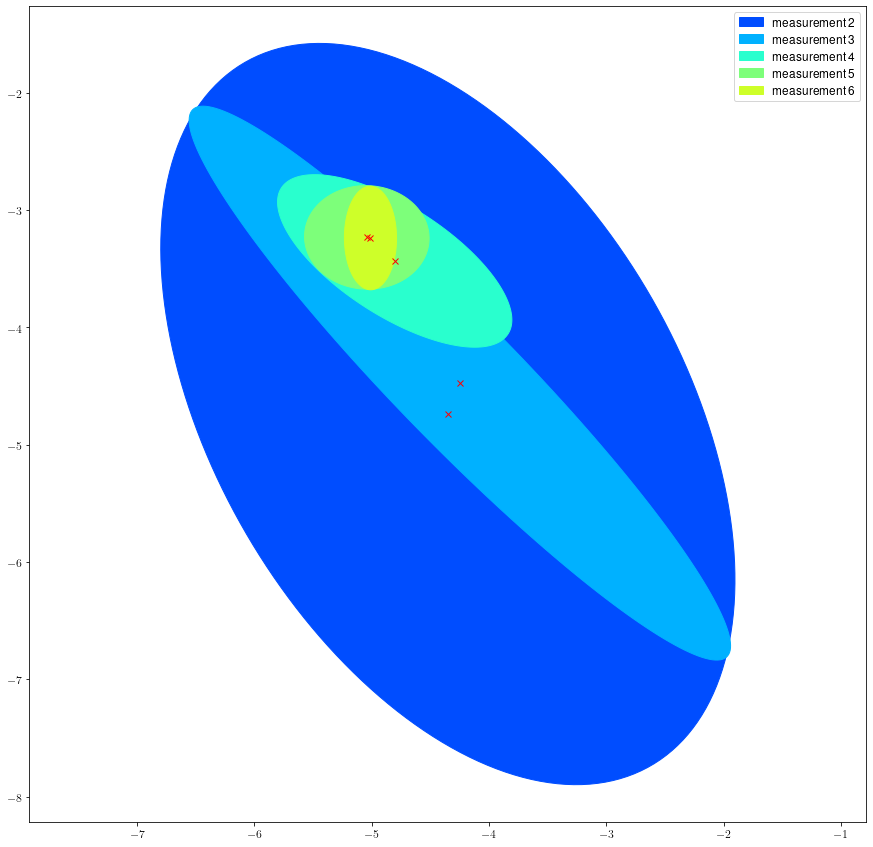

In [122]:
def estimation_position(A, iw, y):
    mu = np.linalg.solve(A.T@A, A.T@y)
    sigma = np.linalg.inv(A.T@iw@A)
    return mu, sigma
    
def plot_ellipse(ax, mu, sigma, i, color):
    # Another way to plot ellipse: https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/#google_vignette
    # Calculate major and minor axes
    u, s, vt = np.linalg.svd(sigma)
    t = np.linspace(0, 2*np.pi, 200)
    chi_square_var = stats.chi2.ppf(0.95, 2)
    major = np.sqrt(s[0] *chi_square_var)
    minor = np.sqrt(s[1] *chi_square_var)
    x = major * np.cos(t)[:,np.newaxis]
    y = minor * np.sin(t)[:,np.newaxis]
    
    theta = np.arctan2(u[0][1], u[0][0])
    # Left multiplication rotation matrix
    R = np.array([[
        np.cos(theta), -np.sin(theta)
    ],[
        np.sin(theta), np.cos(theta)
    ]])
    
    rot_p = R@(np.hstack((x,y)).T)
    trans_p = rot_p + mu
    ax.fill(trans_p[0],trans_p[1],label=f'measurement {i}', color=color)
    ax.plot(mu[0], mu[1], 'x', color='red')
    
    
# Prepare data
theta = [0, 60, 225, 90, 135, 0]
A_list = [[np.cos(t*np.pi/180), np.sin(t*np.pi/180)] for t in theta]
A = -np.array(A_list)
iw = np.diag([1,1,1/0.05,1/0.1,1/0.05,1/0.01])
y = np.array([4.3510, 6.2792, -5.8264, 2.6491, -1.6033, 4.9427])[:, np.newaxis]


# Estimate position
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
color_map = plt.cm.get_cmap('jet')
colors = [color_map(i/10) for i in range(10)]

for i in range(2, 7):
    x, sigma = estimation_position(A[0:i,0:i], iw[0:i,0:i], y[0:i])
    print('mu:\n', x)
    print('sigma:\n', sigma)
    print("---------------------------------")
    plot_ellipse(ax, x, sigma, i, colors[i])

plt.axis('equal')
plt.legend()
plt.show()

The $\mathrm{MMSE}$ after 6 measurements is:
$$
\mathrm{MMSE} = \mathrm{Tr}(\mathrm{Cov}(x|y)) = 0.03332
$$